#### 노이즈를 넣었을 때, autoencoder 방법으로 얼마나 노이즈가 제거 되는지 측정하는 과정
- 노이즈 
- autoencoder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
# 모델 도식화 가능
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import Sequential
from keras.utils import plot_model
from keras.utils import set_random_seed
from keras.datasets.mnist import load_data

In [2]:
(train_x, _), (test_x, _) = load_data()

In [3]:
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x_flatten = train_x.reshape(train_x.shape[0], -1)
test_x_flatten = test_x.reshape(test_x.shape[0], -1)

In [4]:
print(train_x_flatten.shape, test_x_flatten.shape)

(60000, 784) (10000, 784)


### 노이즈 추가

In [5]:
train_x_noised = train_x_flatten + np.random.normal(0, 0.5, size=train_x_flatten.shape)
test_x_noised = test_x_flatten + np.random.normal(0, 0.5, size=test_x_flatten.shape)

train_x_noised = np.clip(train_x_noised, a_min=0, a_max=1)
test_x_noised = np.clip(test_x_noised, a_min=0, a_max=1)

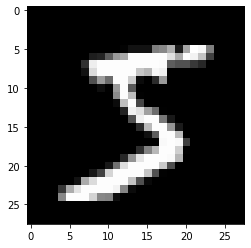

In [6]:
plt.imshow(train_x_flatten[0].reshape(28,28), cmap='gray')

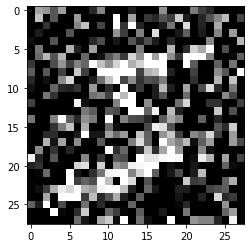

In [7]:
plt.imshow(train_x_noised[0].reshape(28,28), cmap='gray')

In [8]:
def createAuto(node):
    md = Sequential()
    md.add(Dense(units=node, activation='relu', input_shape=(784,)))
    md.add(Dense(784, activation='sigmoid'))
    md.compile(loss='mean_squared_error', optimizer='adam' )
    return md

In [19]:
md = createAuto(100)
md.fit(train_x_noised, train_x_noised, epochs=10, verbose=0)

In [20]:
pre_out = md.predict(train_x_flatten)

1875/1875 [==============================] - 3s 1ms/step


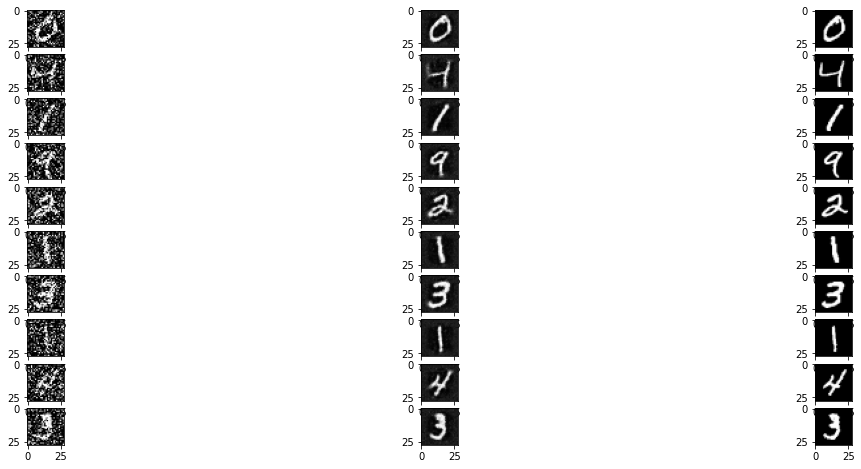

In [32]:
plt.rcParams['figure.figsize'] = (20,8)
fig, axs = plt.subplots(10,3)
for i in range(1,10*3+1):
    if i % 3 == 1:
        plt.subplot(10,3,i)
        plt.imshow(train_x_noised[1+((i-1)//3)].reshape(28,28), cmap='gray')
    elif i % 3 == 2:
        plt.subplot(10,3,i)
        plt.imshow(pre_out[1+((i-1)//3)].reshape(28,28), cmap='gray')
    elif i % 3 == 0:
        plt.subplot(10,3,i)
        plt.imshow(train_x_flatten[1+((i-1)//3)].reshape(28,28), cmap='gray')
plt.show()
# 노이즈 값     예측 값      실제 값